<a href="https://colab.research.google.com/github/ruinhadan/feedforward/blob/master/Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading and Processing Data - Data from Make Blobs (Sklearn)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook 
import seaborn as sns
import imageio
import time
from IPython.display import HTML


from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

from numpy.linalg import norm

In [0]:
np.random.seed(0)

In [0]:
data, labels = make_blobs(n_samples = 1000, centers = 4, n_features = 2, random_state = 0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


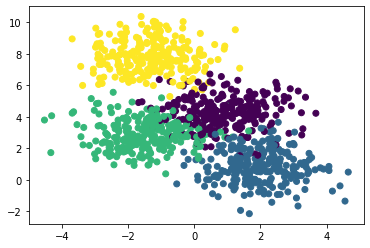

In [0]:
plt.scatter(data[:,0], data[:,1], c = labels)
plt.show()

In [0]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify = labels, random_state = 0)

In [0]:
print(X_train.shape, X_val.shape, labels.shape)

(750, 2) (250, 2) (1000,)


In [0]:
print(X_train)

[[ 2.16429987  4.62072994]
 [ 0.15458897  8.17130474]
 [-1.05504222  9.1328021 ]
 ...
 [-2.31742704  2.01058214]
 [-2.73113913  6.52604787]
 [ 1.14294357  4.93881876]]


In [0]:
print(Y_train)

[0 3 3 2 2 0 3 2 0 1 0 3 1 3 1 2 1 0 2 2 2 1 0 2 2 2 0 3 2 1 3 2 3 2 1 2 0
 1 2 2 3 2 1 1 0 3 2 3 3 0 0 2 2 0 0 0 2 3 0 1 0 0 0 1 2 1 0 1 1 0 0 1 0 2
 1 3 2 3 3 2 1 3 2 2 2 3 3 2 2 1 0 1 3 0 1 1 1 2 3 0 1 3 3 0 2 0 0 1 1 1 3
 0 2 2 1 1 1 2 2 3 1 3 0 0 1 3 0 3 1 3 2 2 0 1 3 3 3 0 2 3 2 3 3 0 0 2 0 0
 3 0 3 0 0 3 0 2 0 3 1 0 0 2 0 0 1 3 3 0 0 3 0 3 0 1 2 2 0 1 0 3 2 0 1 1 1
 1 2 1 1 0 0 1 0 2 3 2 3 0 1 3 1 2 1 0 0 3 0 3 3 0 1 3 2 1 3 2 1 3 2 1 1 0
 1 2 3 0 2 2 0 0 0 1 2 0 3 3 1 0 1 2 3 2 2 2 2 3 0 2 1 2 0 2 1 0 3 2 3 3 2
 0 0 3 2 3 2 1 1 0 3 3 1 0 0 3 1 0 2 0 1 3 1 1 1 1 2 1 0 0 1 1 1 2 3 0 0 2
 2 2 0 1 1 3 1 0 3 2 2 2 0 1 2 3 1 0 2 0 1 0 2 2 2 2 1 0 3 3 1 2 1 3 0 1 1
 1 2 0 3 0 0 0 3 1 0 1 1 1 3 2 3 2 2 3 2 1 0 2 3 1 1 3 3 1 2 1 2 3 3 2 0 1
 1 3 2 2 3 1 3 3 1 0 2 2 3 2 2 0 0 0 0 2 3 0 2 3 0 0 2 0 2 0 3 1 3 3 0 2 3
 3 1 1 1 3 2 1 0 3 1 2 1 2 1 0 0 3 3 3 1 1 0 1 1 1 1 3 0 2 2 0 1 1 1 3 0 2
 2 3 1 2 2 2 1 0 3 0 2 2 3 2 2 3 1 3 2 0 2 2 0 2 2 2 1 2 0 1 1 2 0 2 1 2 2
 3 3 0 2 0 2 0 0 1 3 0 1 

In [0]:
enc = OneHotEncoder()
Y_train = enc.fit_transform(np.expand_dims(Y_train, 1)).toarray()
Y_val = enc.fit_transform(np.expand_dims(Y_val, 1)).toarray()
print(Y_train.shape) 


(750, 4)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [0]:
print(Y_train)

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


# Using optimization algorithms like AdaGrad, NAG, etc.


In [0]:
class FFN:
  def __init__(self, W1, W2):
    self.params = {}
    self.params["W1"] = W1.copy()
    self.params["W2"] = W2.copy()
    self.params["B1"] = np.zeros((1, 2))
    self.params["B2"] = np.zeros((1, 1))
    self.n_L = 2
    self.gradients = {}
    self.update_params = {}
    self.prev_update_params = {}
    for i in range(1, self.n_L + 1):
      self.update_params["v_w" + str(i)] = 0
      self.update_params["v_b" + str(i)] = 0
      self.update_params["m_w" + str(i)] = 0
      self.update_params["m_b" + str(i)] = 0

      self.prev_update_params["v_w" + str(i)] = 0
      self.prev_update_params["v_b" + str(i)] = 0

  def sigmoid(self, X):
    return 1.0/(1.0 + np.exp(-X))

  def grad_sigmoid(self, X):
    return X * (1 - X)

  def fwd_pass(self, X, params = None):
    if params == None:
      params = self.params

    self.A1 = np.matmul(X, params["W1"]) + params["B1"] # (N*2)x(2*2)  = N*2
    self.H1 = self.sigmoid(self.A1) # N*2
    self.A2 = np.matmul(self.H1, params["W2"]) + params["B2"] # (N*2)x(2*1) = N*1
    self.H2 = self.sigmoid(self.A2) # N*1

    return self.H2

  def grad(self, X, Y, params = None):
    if params == None:
      params = self.params
    Y_pred = self.fwd_pass(X)
    #print(Y_pred.shape)
    Y = [[x] for x in Y]
    #print(Y.shape)
    self.gradients["dA2"] = Y_pred - Y
    #print(self.gradients["dA2"])
    self.gradients["dW2"] = np.matmul(self.H1.T, self.gradients["dA2"])
    self.gradients["dB2"] = np.sum(self.gradients["dA2"], axis = 0).reshape(1, -1)
    #print(self.gradients["dA2"].shape, self.params["W2"].T.shape)
    self.gradients["dH1"] = np.matmul(self.gradients["dA2"], params["W2"].T)
    self.gradients["dA1"] = np.multiply(self.gradients["dH1"], self.grad_sigmoid(self.H1))
    self.gradients["dW1"] = np.matmul(X.T, self.gradients["dA1"])
    self.gradients["dB1"] = np.sum(self.gradients["dA1"], axis = 0).reshape(1, -1)  

  def fit(self, X, Y, params = None, eta = 0.1, gamma = 0.1, beta = 0.1, beta1 = 0.1, beta2 = 0.1, eps = 1e-8, show_loss = False, epochs = 100, algo = "GD", mbs = 100):
    if show_loss:
      loss = {}
    
    for epoch in tqdm_notebook(range(epochs), total = epochs, unit = "epoch"):
      m = X.shape[0]
      

      if algo == "GD":
        self.grad(X, Y)
        for i in range(1, self.n_L+1):
          self.params["W" + str(i)] -= eta * (self.gradients["dW" + str(i)]/m)
          self.params["B" + str(i)] -= eta * (self.gradients["dB" + str(i)]/m)
      
      elif algo == "MBG":
        for i in range(0, m, mbs):
          self.grad(X[i:i+mbs+1], Y[i:i+mbs+1])
          for j in range(1, self.n_L + 1):
            self.params["W" + str(i)] -= (eta * self.gradients["dW" + str(i)]/mbs)
            self.params["B" + str(i)] -= (eta * self.gradients["dB" + str(i)]/mbs)
      
      elif algo == "Mom":
        self.grad(X, Y)
        for i in range(1, self.n_L+1):
          self.update_params["v_w" + str(i)] = gamma * self.update_params["v_w" + str(i)] + (eta * self.gradients["dW" + str(i)]/m)
          self.update_params["v_b" + str(i)] = gamma * self.update_params["v_b" + str(i)] + (eta * self.gradients["dB" + str(i)]/m)
          self.params["W" + str(i)] -= (self.update_params["v_w" + str(i)])
          self.params["B" + str(i)] -= (self.update_params["v_b" + str(i)])

      elif algo == "NAG":
        temp = {}
        for i in range(1, self.n_L + 1):
          self.update_params["v_w" + str(i)] = gamma * self.update_params["v_w" + str(i)]
          self.update_params["v_b" + str(i)] = gamma * self.update_params["v_b" + str(i)] 
          temp["W" + str(i)] = self.params["W" + str(i)] - self.update_params["v_w" + str(i)]
          temp["B" + str(i)] = self.params["B" + str(i)] - self.update_params["v_b" + str(i)]
        
        self.grad(X, Y, temp)

        for j in range(1, self.n_L + 1):
          self.update_params["v_w" + str(j)] += (eta * self.gradients["dW" + str(j)] / m)
          self.update_params["v_b" + str(j)] += (eta * self.gradients["dB" + str(j)] / m)
          self.params["W" + str(j)] -= self.update_params["v_w" + str(j)]
          self.params["B" + str(j)] -= self.update_params["v_b" + str(j)]

        #self.prev_update_params = self.update_params

      elif algo == "AdaGrad":
        self.grad(X, Y)
        for i in range(1, self.n_L + 1):
          self.update_params["v_w" + str(i)] += (self.gradients["dW" + str(i)]/m)**2
          self.update_params["v_b" + str(i)] += (self.gradients["dB" + str(i)]/m)**2
          self.params["W" + str(i)] -= (eta/(np.sqrt(self.update_params["v_w" + str(i)] + eps)) * self.gradients["dW" + str(i)] / m)
          self.params["B" + str(i)] -= (eta/(np.sqrt(self.update_params["v_b" + str(i)] + eps)) * self.gradients["dB" + str(i)] / m)
      
      elif algo == "RMSProp":
        self.grad(X, Y)
        for i in range(1, self.n_L + 1):
          self.update_params["v_w" + str(i)] = beta * self.update_params["v_w" + str(i)] + (1 - beta) * (self.gradients["dW" + str(i)]/m)**2
          self.update_params["v_b" + str(i)] = beta * self.update_params["v_b" + str(i)] + (1 - beta) * (self.gradients["dB" + str(i)]/m)**2
          self.params["W" + str(i)] -= (eta/(np.sqrt(self.update_params["v_w" + str(i)] + eps)) * self.gradients["dW" + str(i)] / m)
          self.params["B" + str(i)] -= (eta/(np.sqrt(self.update_params["v_b" + str(i)] + eps)) * self.gradients["dB" + str(i)] / m)

      else:
        self.grad(X, Y)
        num_upd = 0
        for i in range(1, self.n_L + 1):
          num_upd += 1
          self.update_params["m_w" + str(i)] = beta1 * self.update_params["m_w" + str(i)] + (1 - beta1) * (self.gradients["dW" + str(i)]/m)
          self.update_params["m_b" + str(i)] = beta1 * self.update_params["m_b" + str(i)] + (1 - beta1) * (self.gradients["dB" + str(i)]/m)
          self.update_params["v_w" + str(i)] = beta2 * self.update_params["v_w" + str(i)] + (1 - beta2) * (self.gradients["dW" + str(i)]/m)**2
          self.update_params["v_b" + str(i)] = beta2 * self.update_params["v_b" + str(i)] + (1 - beta2) * (self.gradients["dB" + str(i)]/m)**2
          mwc = self.update_params["m_w" + str(i)] / (1 - np.exp(beta1, num_upd))
          mbc = self.update_params["m_b" + str(i)] / (1 - np.exp(beta1, num_upd))
          vwc = self.update_params["v_w" + str(i)] / (1 - np.exp(beta2, num_upd))
          vbc = self.update_params["v_b" + str(i)] / (1 - np.exp(beta2, num_upd))
          self.params["W" + str(i)] -= (eta/(np.sqrt(vwc+ eps)) * mwc)
          self.params["B" + str(i)] -= (eta/(np.sqrt(vbc+ eps)) * mbc)

      if show_loss:
        loss[epoch] = mean_squared_error(Y, self.predict(X))
    
    if show_loss:
      plt.plot(list(map(float, loss.values())), '-o', markersize = 5)
      plt.xlabel("Epochs")
      plt.ylabel("Loss")
      plt.show()

  def predict(self, X):
    Y_pred = self.fwd_pass(X)
    #print(Y_pred.shape)
    return np.array(Y_pred).squeeze()



In [0]:
def print_accuracy():    
    Y_pred_train = model.predict(X_train)
    #print(Y_pred_train)
    binarize = lambda x: 1 if x > 0.5 else 0
    Y_pred_train = [binarize(x) for x in Y_pred_train]
    
    Y_pred_val = model.predict(X_val)
    Y_pred_val = [binarize(x) for x in Y_pred_val]
    accuracy_train = accuracy_score(Y_pred_train, Y_train)
    accuracy_val = accuracy_score(Y_pred_val, Y_val)
    print("Training accuracy", round(accuracy_train, 4))
    print("Validation accuracy", round(accuracy_val, 4))
    
    if False:
      plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_train, cmap=my_cmap, s=15*(np.abs(np.sign(Y_pred_train-Y_train))+.1))
      plt.show()

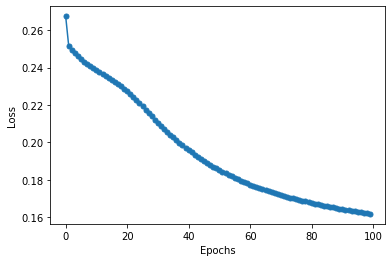

Training accuracy 0.704
Validation accuracy 0.676


In [0]:
model = FFN(W1, W2)
model.fit(X_train, Y_train, epochs=100, eta=1, algo="GD", show_loss=True)
print_accuracy()

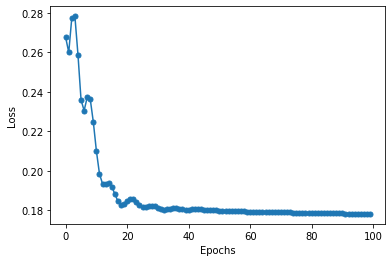

Training accuracy 0.7333
Validation accuracy 0.716
CPU times: user 304 ms, sys: 5 ms, total: 309 ms
Wall time: 315 ms


In [0]:
%%time
model = FFN(W1, W2)
model.fit(X_train, Y_train, epochs=100, eta=1, algo="Mom", gamma=0.9, show_loss=True)
print_accuracy()

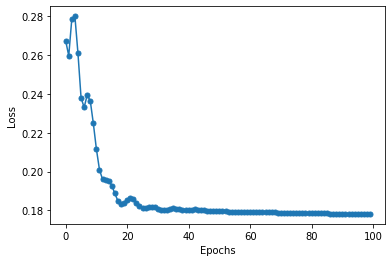

Training accuracy 0.7333
Validation accuracy 0.716
CPU times: user 309 ms, sys: 4.98 ms, total: 314 ms
Wall time: 317 ms


In [0]:
%%time
model = FFN(W1, W2)
model.fit(X_train, Y_train, epochs=100, eta=1, algo="NAG", gamma=0.9, show_loss=True)
print_accuracy()

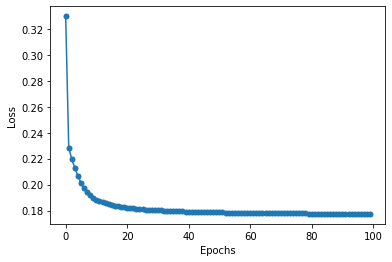

Training accuracy 0.7347
Validation accuracy 0.716
CPU times: user 284 ms, sys: 15.9 ms, total: 300 ms
Wall time: 320 ms


In [0]:
%%time
model = FFN(W1, W2)
model.fit(X_train, Y_train, epochs=100, eta=1, algo="AdaGrad", show_loss=True)
print_accuracy()

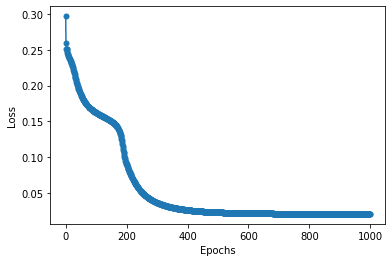

Training accuracy 0.9747
Validation accuracy 0.94
CPU times: user 1.14 s, sys: 14.1 ms, total: 1.15 s
Wall time: 1.19 s


In [0]:
%%time
model = FFN(W1, W2)
model.fit(X_train, Y_train, epochs=1000, eta=0.5, algo="NAG", gamma=0.5, show_loss=True)
print_accuracy()

# Varying the non-linearity


In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
class FFN:
  def __init__(self, init_method = 'Random', activation_func = 'Sigmoid', leaky_slope = 0.1):
    self.params = {}
    self.n_L = 3
    self.sizes = [4, 4, 3, 3]
    self.activation_func = activation_func
    self.init_method = init_method
    self.leaky_slope = leaky_slope
    self.params_h = []
    np.random.seed(0)
    if self.init_method == 'Random':
      for i in range(1, self.n_L + 1):
        self.params["W" + str(i)] = np.random.randn(self.sizes[i-1], self.sizes[i])
        self.params["B" + str(i)] = np.random.randn(1, self.sizes[i])
    elif self.init_method == 'Zeros':
      for i in range(1, self.n_L + 1):
        self.params["W" + str(i)] = np.zeros(self.sizes[i-1], self.sizes[i])
        self.params["B" + str(i)] = np.zeros(1, self.sizes[i])
    elif self.init_method == 'Xavier':
      for i in range(1, self.n_L + 1):
        self.params["W" + str(i)] = np.random.randn(self.sizes[i-1], self.sizes[i])*(np.sqrt(1/self.sizes[i-1]))
        self.params["B" + str(i)] = np.random.randn(1, self.sizes[i])*(np.sqrt(1/self.sizes[i-1]))
    elif self.init_method == 'He':
      for i in range(1, self.n_L + 1):
        self.params["W" + str(i)] = np.random.randn(self.sizes[i-1], self.sizes[i])*(np.sqrt(2/self.sizes[i-1]))
        self.params["B" + str(i)] = np.random.randn(1, self.sizes[i])*(np.sqrt(2/self.sizes[i-1]))

    self.gradients = {}
    self.update_params = {}
    self.prev_update_params = {}

    for i in range(1, self.n_L + 1):
      self.update_params["v_w" + str(i)] = 0
      self.update_params["v_b" + str(i)] = 0
      self.update_params["m_w" + str(i)] = 0
      self.update_params["m_b" + str(i)] = 0

      self.prev_update_params["v_w" + str(i)] = 0
      self.prev_update_params["v_b" + str(i)] = 0

  def fwd_activation(self, X):
    if self.activation_func == 'Sigmoid':
      return 1.0/(1.0 - np.exp(X))
    elif self.activation_func == 'Tanh':
      return np.tanh(X)
    elif self.activation_func == 'ReLu':
      return np.maximum(0, X)
    elif self.activation_func == 'LeakyReLu':
      return np.maximum(self.leaky_slope * X, X)

  def grad_activation(self, X):
    if self.activation_func == 'Sigmoid':
      return X * (1 - X)
    elif self.activation_func == 'Tanh':
      return (1 - np.square(X))
    elif self.activation_func == 'ReLu':
      return 1.0*(X>0)
    elif self.activation_func == 'LeakyReLu':
      d = np.zeros_like(X)
      d[X <= 0] = self.leaky_slope
      d[X > 0] = 1.0
      return d
 
  def softmax(self, X):
    exps = np.exp(X)
    return exps / np.sum(exps, axis=1).reshape(-1,1)

  def fwd_pass(self, X, params = None):
    if params == None:
      params = self.params

    self.A = {}
    self.H = {}
    self.H[0] = X
    for i in range(1, self.n_L):
      self.A[i] = np.matmul(self.H[i-1], params["W" + str(i)]) + params["B" + str(i)]
      self.H[i] = self.fwd_activation(self.A[i])

    self.A[self.n_L] = np.matmul(self.H[self.n_L-1], params["W" + str(self.n_L)]) + params["B" + str(self.n_L)]
    self.H[self.n_L] = self.softmax(self.A[self.n_L])
    return self.H[self.n_L]

  def grad(self, X, Y, params = None):
    if params == None:
      params = self.params
    Y_pred = self.fwd_pass(X, params)
    self.gradients["dA" + str(self.n_L)] = Y_pred - Y
    for i in range(self.n_L, 0, -1):
      self.gradients["dW" + str(i)] = np.matmul(self.H[i-1].T, self.gradients["dA" + str(i)])
      self.gradients["dB" + str(i)] = np.sum(self.gradients["dA" + str(i)], axis = 0).reshape(1, -1)
      self.gradients["dH" + str(i-1)] = np.matmul(self.gradients["dA" + str(i)], params["W" + str(i)].T)
      self.gradients["dA" + str(i-1)] = np.multiply(self.gradients["dH" + str(i-1)], self.grad_activation(self.H[i-1]))

  def fit(self, X, Y, params = None, eta = 0.1, gamma = 0.1, beta = 0.1, beta1 = 0.1, beta2 = 0.1, eps = 1e-8, show_loss = False, epochs = 100, algo = "GD", mbs = 100):
    if show_loss:
      loss = {}
    
    for epoch in tqdm_notebook(range(epochs), total = epochs, unit = "epoch"):
      m = X.shape[0]
      

      if algo == "GD":
        self.grad(X, Y)
        for i in range(1, self.n_L+1):
          self.params["W" + str(i)] -= eta * (self.gradients["dW" + str(i)]/m)
          self.params["B" + str(i)] -= eta * (self.gradients["dB" + str(i)]/m)
      
      elif algo == "MBG":
        for i in range(0, m, mbs):
          self.grad(X[i:i+mbs+1], Y[i:i+mbs+1])
          for j in range(1, self.n_L + 1):
            self.params["W" + str(i)] -= (eta * self.gradients["dW" + str(i)]/mbs)
            self.params["B" + str(i)] -= (eta * self.gradients["dB" + str(i)]/mbs)
      
      elif algo == "Mom":
        self.grad(X, Y)
        for i in range(1, self.n_L+1):
          self.update_params["v_w" + str(i)] = gamma * self.update_params["v_w" + str(i)] + (eta * self.gradients["dW" + str(i)]/m)
          self.update_params["v_b" + str(i)] = gamma * self.update_params["v_b" + str(i)] + (eta * self.gradients["dB" + str(i)]/m)
          self.params["W" + str(i)] -= (self.update_params["v_w" + str(i)])
          self.params["B" + str(i)] -= (self.update_params["v_b" + str(i)])

      elif algo == "NAG":
        temp = {}
        for i in range(1, self.n_L + 1):
          self.update_params["v_w" + str(i)] = gamma * self.update_params["v_w" + str(i)]
          self.update_params["v_b" + str(i)] = gamma * self.update_params["v_b" + str(i)] 
          temp["W" + str(i)] = self.params["W" + str(i)] - self.update_params["v_w" + str(i)]
          temp["B" + str(i)] = self.params["B" + str(i)] - self.update_params["v_b" + str(i)]
        
        self.grad(X, Y, temp)

        for j in range(1, self.n_L + 1):
          self.update_params["v_w" + str(j)] += (eta * self.gradients["dW" + str(j)] / m)
          self.update_params["v_b" + str(j)] += (eta * self.gradients["dB" + str(j)] / m)
          self.params["W" + str(j)] -= self.update_params["v_w" + str(j)]
          self.params["B" + str(j)] -= self.update_params["v_b" + str(j)]

        #self.prev_update_params = self.update_params

      elif algo == "AdaGrad":
        self.grad(X, Y)
        for i in range(1, self.n_L + 1):
          self.update_params["v_w" + str(i)] += (self.gradients["dW" + str(i)]/m)**2
          self.update_params["v_b" + str(i)] += (self.gradients["dB" + str(i)]/m)**2
          self.params["W" + str(i)] -= (eta/(np.sqrt(self.update_params["v_w" + str(i)] + eps)) * self.gradients["dW" + str(i)] / m)
          self.params["B" + str(i)] -= (eta/(np.sqrt(self.update_params["v_b" + str(i)] + eps)) * self.gradients["dB" + str(i)] / m)
      
      elif algo == "RMSProp":
        self.grad(X, Y)
        for i in range(1, self.n_L + 1):
          self.update_params["v_w" + str(i)] = beta * self.update_params["v_w" + str(i)] + (1 - beta) * (self.gradients["dW" + str(i)]/m)**2
          self.update_params["v_b" + str(i)] = beta * self.update_params["v_b" + str(i)] + (1 - beta) * (self.gradients["dB" + str(i)]/m)**2
          self.params["W" + str(i)] -= (eta/(np.sqrt(self.update_params["v_w" + str(i)] + eps)) * self.gradients["dW" + str(i)] / m)
          self.params["B" + str(i)] -= (eta/(np.sqrt(self.update_params["v_b" + str(i)] + eps)) * self.gradients["dB" + str(i)] / m)

      else:
        self.grad(X, Y)
        num_upd = 0
        for i in range(1, self.n_L + 1):
          num_upd += 1
          self.update_params["m_w" + str(i)] = beta1 * self.update_params["m_w" + str(i)] + (1 - beta1) * (self.gradients["dW" + str(i)]/m)
          self.update_params["m_b" + str(i)] = beta1 * self.update_params["m_b" + str(i)] + (1 - beta1) * (self.gradients["dB" + str(i)]/m)
          self.update_params["v_w" + str(i)] = beta2 * self.update_params["v_w" + str(i)] + (1 - beta2) * (self.gradients["dW" + str(i)]/m)**2
          self.update_params["v_b" + str(i)] = beta2 * self.update_params["v_b" + str(i)] + (1 - beta2) * (self.gradients["dB" + str(i)]/m)**2
          mwc = self.update_params["m_w" + str(i)] / (1 - np.power(beta1, num_upd))
          mbc = self.update_params["m_b" + str(i)] / (1 - np.power(beta1, num_upd))
          vwc = self.update_params["v_w" + str(i)] / (1 - np.power(beta2, num_upd))
          vbc = self.update_params["v_b" + str(i)] / (1 - np.power(beta2, num_upd))
          self.params["W" + str(i)] -= (eta/(np.sqrt(vwc+ eps)) * mwc)
          self.params["B" + str(i)] -= (eta/(np.sqrt(vbc+ eps)) * mbc)

      if show_loss:
        Y_pred = self.predict(X)
        #print(Y_pred.shape)
        loss[epoch] = log_loss(np.argmax(Y, axis = 1), Y_pred)
    
    if show_loss:
      plt.plot(list(map(float, loss.values())), '-o', markersize = 5)
      plt.xlabel("Epochs")
      plt.ylabel("Loss")
      plt.show()

  def predict(self, X):
    Y_pred = self.fwd_pass(X)
    return np.array(Y_pred).squeeze()



In [0]:
model = FFN(init_method='Xavier', activation_func='Sigmoid')
model.fit(X_train, Y_train, epochs=100, eta=0.1, gamma = 0.9, algo="Mom", show_loss=False)
Y_train_pred = model.predict(X_train)
Y_val_pred = model.predict(X_val)

print(accuracy_score(np.argmax(Y_train_pred, 1), np.argmax(Y_train,1 )))
print(accuracy_score(np.argmax(Y_val_pred, 1), np.argmax(Y_val,1 )))


0.4
0.388


In [0]:
model = FFN(init_method='Xavier', activation_func='Sigmoid')
model.fit(X_train, Y_train, epochs=100, eta=0.1, gamma = 0.9, algo="NAG", show_loss=False)
Y_train_pred = model.predict(X_train)
Y_val_pred = model.predict(X_val)

print(accuracy_score(np.argmax(Y_train_pred, 1), np.argmax(Y_train,1 )))
print(accuracy_score(np.argmax(Y_val_pred, 1), np.argmax(Y_val,1 )))


0.4226666666666667
0.408


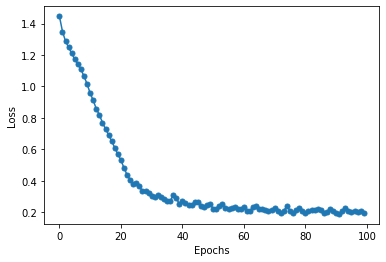

0.9253333333333333
0.932


In [0]:
model = FFN(init_method='Xavier', activation_func='Tanh')
model.fit(X_train, Y_train, epochs=100, eta=0.1, beta1 = 0.5, beta2 = 0.5, algo="Adam", show_loss=True)
Y_train_pred = model.predict(X_train)
Y_val_pred = model.predict(X_val)

print(accuracy_score(np.argmax(Y_train_pred, 1), np.argmax(Y_train,1 )))
print(accuracy_score(np.argmax(Y_val_pred, 1), np.argmax(Y_val,1 )))

# Iris Dataset - LeakyReLU, with He initialization and AdaGrad optimization

In [0]:
from sklearn.datasets import load_iris

In [0]:
iris = load_iris()
data = iris.data
labels = iris.target

In [0]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0, test_size=0.2)

In [0]:
enc = OneHotEncoder()
y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
y_OH_val = enc.fit_transform(np.expand_dims(Y_val,1)).toarray()

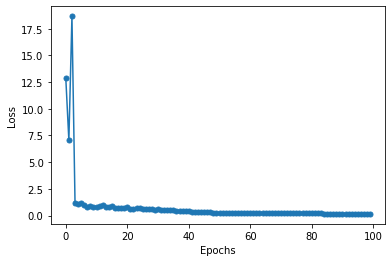

Training accuracy 0.9583
Validation accuracy 1.0


In [0]:
model = FFN(init_method='He',activation_func='LeakyReLu')
model.fit(X_train, y_OH_train,algo='AdaGrad', beta1 = 0.2, beta2 = 0.9, beta = 0.9, epochs=100, eta=1, show_loss=True)
Y_pred_train = model.predict(X_train)
Y_pred_train = np.argmax(Y_pred_train,1)
Y_pred_val = model.predict(X_val)
Y_pred_val = np.argmax(Y_pred_val,1)
accuracy_train = accuracy_score(Y_pred_train, Y_train)
accuracy_val = accuracy_score(Y_pred_val, Y_val)
print("Training accuracy", round(accuracy_train, 4))
print("Validation accuracy", round(accuracy_val, 4))    